In [ ]:


from google.colab import auth
import gspread
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score
from google.auth import default
import pandas as pd


In [ ]:
r=pd.read_csv('/content/DL - Sheet1.csv')
r

,INPUT,OUTPUT
0,1,11
1,2,21
2,3,31
3,4,41
4,5,51
5,6,61
6,7,71
7,8,81
8,9,91
9,10,101


In [ ]:
auth.authenticate_user()
creds,_=default()
gc=gspread.authorize(creds)

worksheet=gc.open('DL').sheet1
r=worksheet.get_all_values()

dataset1 = pd.DataFrame(r[1:], columns=r[0])
dataset1 = dataset1.astype({'INPUT':'float'})
dataset1 = dataset1.astype({'OUTPUT':'float'})
dataset1.head()

,INPUT,OUTPUT
0,1.0,11.0
1,2.0,21.0
2,3.0,31.0
3,4.0,41.0
4,5.0,51.0


In [ ]:
X = dataset1.iloc[:, :-1].values
y = dataset1.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)

In [ ]:
Scaler = MinMaxScaler()
Scaler.fit(X_train)


MinMaxScaler()

In [ ]:
X_train = Scaler.transform(X_train)


In [ ]:
ai_brain = Sequential([
    Dense(8, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1)
])

In [ ]:
ai_brain.compile(optimizer='rmsprop',loss='mse')
ai_brain.fit(X_train,y_train,epochs=2000)

Epoch 1/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 12091.8438
Epoch 2/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 12085.1211
Epoch 3/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 12080.1221
Epoch 4/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 12075.8682
Epoch 5/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 12072.0420
Epoch 6/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 12068.4951
Epoch 7/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 12065.1406
Epoch 8/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 12061.9297
Epoch 9/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 12058.8281
Epoch 10/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 12055.8154
Epoch 11/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 12052.8701
Epoch 12/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 12049.9775
Epoch 13/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 12047.1279
Epoch 14/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - loss: 12044.3076
Epoch 15/2000
1/

<Axes: >

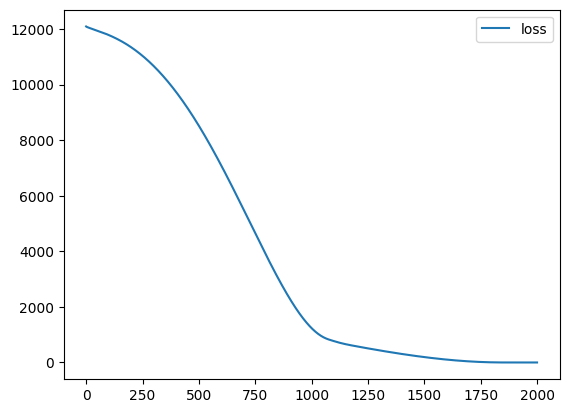

In [ ]:
loss_df = pd.DataFrame(ai_brain.history.history)
loss_df.plot()

In [ ]:
X_test1 = Scaler.transform(X_test)

In [ ]:
ai_brain.evaluate(X_test1,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 0.2961


0.2960676848888397

In [ ]:
X_n1 = [[4]]

In [ ]:
X_n1_1 = Scaler.transform(X_n1)

In [ ]:
ai_brain.predict(X_n1_1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[41.070503]], dtype=float32)

**EX 02**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
